In [1]:
# Google Colab Code: Read and Explore a Parquet File

# Step 1: Install required library (if not available)
!pip install pyarrow pandas --quiet
!pip install  fastparquet


import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.2 MB/s eta 0:00:00


#File selection

In [4]:
from google.colab import files
# Step 2: Upload the file from local machine to Colab

uploaded = files.upload()


filename = "Test_2021-03.parquet"

df = pd.read_parquet(filename, engine='pyarrow')



Saving Test_2021-03.parquet to Test_2021-03 (2).parquet


In [12]:
#  Step 3: Check which channels actually exist in the dataframe
print("Unique channels:", df['channel_name'].unique())

# Check if the tariff channels are present
existing_tariffs = [t for t in ['r1iae', 'r2iae', 'r3iae', 'r1eae', 'r2eae', 'r3eae', 'tiae', 'teae'] if t in df['channel_name'].unique()]
print("\n Tariffs found:", existing_tariffs)

# Check if the 'dif' column exists
print("\n Available columns:", df.columns)

# Check if there are valid records for 'dif'
print("\n Valid records with dif:", df[df['channel_name'].isin(existing_tariffs)]['dif'].dropna().shape[0])



Unique channels: ['hl3eae' 'iape' 'ivl1' 'hl2eae' 'iapi' 'hl1eae' 'hl1iae' 'hl2iae'
 'hl3iae' 'tiae' 'teae' 'r1iae' 'r3iae' 'ivl2' 'ivl3' 'r3eae' 'r1eae'
 'r2iae' 'r2eae']

 Tariffs found: ['r1iae', 'r2iae', 'r3iae', 'r1eae', 'r2eae', 'r3eae', 'tiae', 'teae']

 Available columns: Index(['timestamp', 'entry_id', 'device_slug', 'channel_name', 'channel_type',
       'number', 'total', 'dif'],
      dtype='object')

 Valid records with dif: 365373


# Plots


Shape of dataset: (8466641, 8)

Column names:
 Index(['timestamp', 'entry_id', 'device_slug', 'channel_name', 'channel_type',
       'number', 'total', 'dif'],
      dtype='object')

Sample data:
    timestamp  entry_id           device_slug channel_name   channel_type  \
0 2021-03-01    397954   6226650206159650422       hl3eae  NumberChannel   
1 2021-03-01    343456  16453699573622016846         iape  NumberChannel   
2 2021-03-01    333467  16453699573622016846         ivl1  NumberChannel   
3 2021-03-01    397953   6226650206159650422       hl2eae  NumberChannel   
4 2021-03-01    524151   6226650206159650422         iapi  NumberChannel   

   number  total  dif  
0     0.0    NaN  NaN  
1     0.0    NaN  NaN  
2   231.1    NaN  NaN  
3     0.0    NaN  NaN  
4   211.0    NaN  NaN  
['timestamp', 'entry_id', 'device_slug', 'channel_name', 'channel_type', 'number', 'total', 'dif']

Missing values per column:
 timestamp             0
entry_id              0
device_slug           0
ch

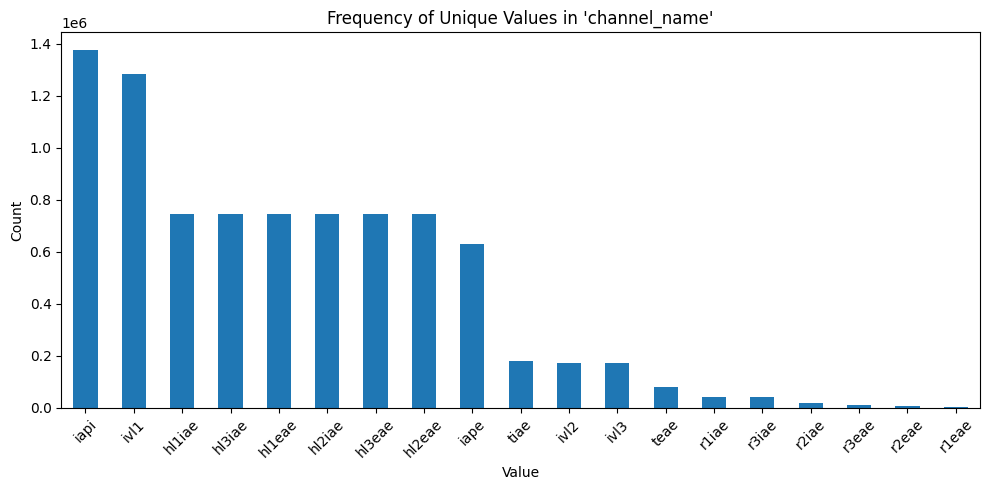

,device_slug,registos
0,32749250988328314,2117
1,505936531794424568,44354
2,512465517622221965,3486
3,1323318041006257935,44605
4,1495335862187239725,17983
5,1516219148729663596,44526
6,1775722075867893398,19058
7,1971661595742085523,10163
8,2296390107890512539,42148
9,2642616459034317080,44618


from matplotlib import pyplot as plt
summary['device_slug'].plot(kind='hist', bins=20, title='device_slug')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary['registos'].plot(kind='hist', bins=20, title='registos')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary.plot(kind='scatter', x='device_slug', y='registos', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['device_slug']
  ys = series['registos']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = summary.sort_values('device_slug', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('device_slug')
_ = plt.ylabel('registos')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['device_slug']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'device_slug'}, axis=1)
              .sort_values('device_slug', ascending=True))
  xs = counted['device_slug']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = summary.sort_values('device_slug', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('device_slug')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
summary['device_slug'].plot(kind='line', figsize=(8, 4), title='device_slug')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary['registos'].plot(kind='line', figsize=(8, 4), title='registos')
plt.gca().spines[['top', 'right']].set_visible(False)

In [13]:
# Step 4: Basic exploration

print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns)
print("\nSample data:\n", df.head())
print(df.columns.tolist())
print("\nMissing values per column:\n", df.isnull().sum())

# Optional: Describe numeric columns
print("\nStatistical summary:\n", df.describe())


# Count unique values
value_counts = df["channel_name"].value_counts()

# Plot
value_counts.plot(kind='bar', figsize=(10, 5))
plt.title("Frequency of Unique Values in 'channel_name'")
plt.xlabel("Value")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_iapi = df[df['channel_name'] == 'iapi'].copy()

# Group by device_slug
summary = df_iapi.groupby('device_slug').agg(
    registos=('entry_id', 'count'),
).reset_index()

# Exibir a tabela


display(summary)



Gerar tabela interactiva

In [14]:
import ipywidgets as widgets
from IPython.display import display

# Garantir que a coluna timestamp está como datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filtrar apenas o canal 'iapi'
df_iapi = df[df['channel_name'] == 'iapi'].copy()
df_iapi.sort_values('timestamp', inplace=True)

# Widgets
start_date = widgets.DatePicker(
    description='Data inicial:',
    value=df_iapi['timestamp'].min().date(),
)

end_date = widgets.DatePicker(
    description='Data final:',
    value=df_iapi['timestamp'].max().date(),
)

metric_dropdown = widgets.Dropdown(
    options=['number', 'total', 'dif'],
    value='number',
    description='Métrica:',
)

# Função de atualização
def update_table(start, end, metric):
    if start is None or end is None:
        print("Selecione datas válidas.")
        return

    mask = (df_iapi['timestamp'] >= pd.Timestamp(start)) & (df_iapi['timestamp'] <= pd.Timestamp(end))
    filtered = df_iapi[mask]

    if filtered.empty:
        print("Sem dados no intervalo selecionado.")
        return

    # Mostrar resumo
    print(f"Total de registos: {len(filtered)}")
    print(f"Soma da métrica '{metric}': {filtered[metric].sum():,.2f}")

    # Mostrar tabela com as colunas relevantes
    display(filtered[['timestamp', 'entry_id', 'device_slug', metric]].reset_index(drop=True))

# Interface
ui = widgets.VBox([start_date, end_date, metric_dropdown])
out = widgets.interactive_output(update_table, {'start': start_date, 'end': end_date, 'metric': metric_dropdown})

display(ui, out)

Output()

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Garantir datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Canais corretos
canal_1 = 'iapi'  # potência importada
canal_2 = 'iape'  # potência exportada

# Slugs com ambos os canais
slugs_1 = set(df[df['channel_name'] == canal_1]['device_slug'].unique())
slugs_2 = set(df[df['channel_name'] == canal_2]['device_slug'].unique())
common_slugs = sorted(list(slugs_1.intersection(slugs_2)))

# Datas disponíveis
min_date = df['timestamp'].dt.date.min()
max_date = df['timestamp'].dt.date.max()

# Widgets de seleção
slug_selector = widgets.Dropdown(
    options=common_slugs,
    description='Device Slug:',
    value=common_slugs[0] if common_slugs else None,
    layout=widgets.Layout(width='50%')
)

start_date_selector = widgets.DatePicker(
    description='Data início:',
    value=pd.to_datetime(min_date),
    layout=widgets.Layout(width='45%')
)

end_date_selector = widgets.DatePicker(
    description='Data fim:',
    value=pd.to_datetime(max_date),
    layout=widgets.Layout(width='45%')
)

# Função principal para plotar potência líquida
def plot_potencia_liquida(slug, start_date, end_date):
    if not slug or not start_date or not end_date:
        print("Selecione o slug e o intervalo de datas.")
        return

    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date) + pd.Timedelta(days=1)

    # Filtrar dados
    df_iapi = df[(df['channel_name'] == canal_1) & (df['device_slug'] == slug) & (df['timestamp'] >= start) & (df['timestamp'] < end)].copy()
    df_iape = df[(df['channel_name'] == canal_2) & (df['device_slug'] == slug) & (df['timestamp'] >= start) & (df['timestamp'] < end)].copy()

    if df_iapi.empty or df_iape.empty:
        print(f"Sem dados para slug {slug} entre {start_date} e {end_date}.")
        return

    # Ordenar e fazer merge para alinhar timestamps
    df_iapi.sort_values('timestamp', inplace=True)
    df_iape.sort_values('timestamp', inplace=True)

    df_diff = pd.merge_asof(
        df_iapi[['timestamp', 'number']],
        df_iape[['timestamp', 'number']],
        on='timestamp',
        direction='nearest',
        tolerance=pd.Timedelta(seconds=60),
        suffixes=('_iapi', '_iape')
    )

    df_diff.dropna(inplace=True)
    df_diff['potencia_liquida'] = df_diff['number_iapi'] - df_diff['number_iape']

    # Plot
    plt.figure(figsize=(29, 9))
    plt.plot(df_diff['timestamp'], df_diff['potencia_liquida'], color='black', linewidth=2, label='Potência líquida (iapi - iape)')
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.title(f"Potência líquida (iapi - iape) para slug {slug} — {start_date} a {end_date}")
    plt.xlabel("Timestamp")
    plt.ylabel("Potência líquida (W)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Interface interativa
ui = widgets.VBox([
    slug_selector,
    widgets.HBox([start_date_selector, end_date_selector])
])
out = widgets.interactive_output(
    plot_potencia_liquida,
    {
        'slug': slug_selector,
        'start_date': start_date_selector,
        'end_date': end_date_selector
    }
)

display(ui, out)




Output()

# Profiles (24h stacked plus average and STD)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Garantir datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filtrar apenas canal 'iapi'
df_iapi = df[df['channel_name'] == 'iapi'].copy()
df_iapi.sort_values('timestamp', inplace=True)

# Lista de slugs disponíveis
available_slugs = sorted(df_iapi['device_slug'].unique())

# Dropdown widget
slug_dropdown = widgets.Dropdown(
    options=available_slugs,
    description='Device Slug:',
    value=available_slugs[0],
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Função de plot com média e desvio padrão
def plot_by_slug(slug):
    df_sel = df_iapi[df_iapi['device_slug'] == slug].copy()

    if df_sel.empty:
        print(f"Nenhum dado encontrado para o slug {slug}")
        return

    # Extrair hora decimal e dia
    df_sel['day'] = df_sel['timestamp'].dt.date
    df_sel['hour'] = df_sel['timestamp'].dt.hour + df_sel['timestamp'].dt.minute / 60

    plt.figure(figsize=(14, 7))

    # Plotar uma linha por dia
    for dia, grupo in df_sel.groupby('day'):
        plt.plot(grupo['hour'], grupo['number'], label=str(dia), alpha=0.3)

    # Calcular média e desvio padrão por hora
    stats_por_hora = df_sel.groupby('hour')['number'].agg(['mean', 'std']).dropna()

    # Faixa de desvio padrão
    plt.fill_between(stats_por_hora.index,
                     stats_por_hora['mean'] - stats_por_hora['std'],
                     stats_por_hora['mean'] + stats_por_hora['std'],
                     color='gray', alpha=0.3, label='±1 desvio padrão')

    # Linha de média destacada
    plt.plot(stats_por_hora.index,
             stats_por_hora['mean'],
             color='black', linewidth=2, linestyle='-', label='Média de todos os dias')

    # Gráfico final
    plt.title(f"Perfil diário do canal 'iapi' para device_slug {slug}")
    plt.xlabel("Hora do dia")
    plt.ylabel("Valor (number)")
    plt.xlim(0, 24)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title="Legenda", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.show()

# Interface interativa
widgets.interact(plot_by_slug, slug=slug_dropdown)



interactive(children=(Dropdown(description='Device Slug:', layout=Layout(width='50%'), options=(np.uint64(3274…

<function __main__.plot_by_slug(slug)>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Garantir datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filtrar apenas iapi e iape
df_power = df[df['channel_name'].isin(['iapi', 'iape'])].copy()
df_power.sort_values('timestamp', inplace=True)

# Lista de slugs disponíveis
available_slugs = sorted(df_power['device_slug'].unique())

# Dropdown widget
slug_dropdown = widgets.Dropdown(
    options=available_slugs,
    description='Device Slug:',
    value=available_slugs[0],
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Função de plot
def plot_power_balance(slug):
    # Filtrar os dados do slug selecionado
    df_sel = df_power[df_power['device_slug'] == slug].copy()

    if df_sel.empty:
        print(f"Nenhum dado encontrado para o slug {slug}")
        return

    # Separar iapi e iape
    df_iapi = df_sel[df_sel['channel_name'] == 'iapi'][['timestamp', 'number']].rename(columns={'number': 'iapi'})
    df_iape = df_sel[df_sel['channel_name'] == 'iape'][['timestamp', 'number']].rename(columns={'number': 'iape'})

    # Fazer merge pelas timestamps mais próximas (dentro de 30 segundos, ajustável)
    df_merged = pd.merge_asof(
        df_iapi.sort_values('timestamp'),
        df_iape.sort_values('timestamp'),
        on='timestamp',
        direction='nearest',
        tolerance=pd.Timedelta(seconds=30)
    )

    # Calcular diferença
    df_merged['net_power'] = df_merged['iapi'].fillna(0) - df_merged['iape'].fillna(0)

    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(df_merged['timestamp'], df_merged['net_power'], color='purple', label='Potência líquida (iapi - iape)')
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.title(f"Potência líquida ao longo do tempo - device_slug {slug}")
    plt.xlabel("Timestamp")
    plt.ylabel("Potência líquida (W)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Interatividade
widgets.interact(plot_power_balance, slug=slug_dropdown)


interactive(children=(Dropdown(description='Device Slug:', layout=Layout(width='50%'), options=(np.uint64(3274…

<function __main__.plot_power_balance(slug)>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Garantir datetime correto
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Canais de interesse
target_channels = ['ivl1', 'iape']

# Lista de slugs com ambos os canais
slugs_ivl1 = set(df[df['channel_name'] == 'ivl1']['device_slug'].unique())
slugs_iape = set(df[df['channel_name'] == 'iape']['device_slug'].unique())
common_slugs = sorted(list(slugs_ivl1.intersection(slugs_iape)))

# Obter intervalo total de datas disponíveis
min_date = df['timestamp'].dt.date.min()
max_date = df['timestamp'].dt.date.max()

# Dropdown para device_slug
slug_dropdown = widgets.Dropdown(
    options=common_slugs,
    description='Device Slug:',
    value=common_slugs[0] if common_slugs else None,
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# DatePickers para intervalo de datas
start_date_picker = widgets.DatePicker(
    description='Data início:',
    value=pd.to_datetime(min_date),
    layout=widgets.Layout(width='45%')
)

end_date_picker = widgets.DatePicker(
    description='Data fim:',
    value=pd.to_datetime(max_date),
    layout=widgets.Layout(width='45%')
)

# Função principal para gerar o gráfico
def plot_ivl1_iape(slug, start_date, end_date):
    if not slug or not start_date or not end_date:
        print("Selecione um slug e intervalo de datas válido.")
        return

    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date) + pd.Timedelta(days=1)

    # Filtrar dados por slug, canal e intervalo de datas
    df_ivl1 = df[
        (df['channel_name'] == 'ivl1') &
        (df['device_slug'] == slug) &
        (df['timestamp'] >= start) & (df['timestamp'] < end)
    ].copy()

    df_iape = df[
        (df['channel_name'] == 'iape') &
        (df['device_slug'] == slug) &
        (df['timestamp'] >= start) & (df['timestamp'] < end)
    ].copy()

    if df_ivl1.empty or df_iape.empty:
        print(f"Sem dados para o slug {slug} entre {start_date} e {end_date}.")
        return

    # Ordenar
    df_ivl1.sort_values('timestamp', inplace=True)
    df_iape.sort_values('timestamp', inplace=True)

    # Plot
    fig, ax1 = plt.subplots(figsize=(29, 9))

    ax1.plot(df_ivl1['timestamp'], df_ivl1['number'], color='blue', label='ivl1 - number')
    ax1.set_xlabel("Timestamp")
    ax1.set_ylabel("ivl1 - number", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(df_iape['timestamp'], df_iape['number'], color='orange', label='iape - number')
    ax2.set_ylabel("iape - number", color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    plt.title(f"Evolução de 'ivl1' e 'iape' para slug {slug} ({start_date} a {end_date})")
    fig.tight_layout()
    plt.grid(True)
    plt.show()

# Interface interativa
ui = widgets.VBox([slug_dropdown, widgets.HBox([start_date_picker, end_date_picker])])
out = widgets.interactive_output(plot_ivl1_iape, {
    'slug': slug_dropdown,
    'start_date': start_date_picker,
    'end_date': end_date_picker
})

display(ui, out)



Output()

# Energy rate exploration

---



In [25]:

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Garantir datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Tarifas disponíveis
import_tarifas = ['r1iae', 'r2iae', 'r3iae']
export_tarifas = ['r1eae', 'r2eae', 'r3eae']
all_tarifas = import_tarifas + export_tarifas

# Subconjunto com apenas as tarifas e 'dif'
df_tarifas = df[df['channel_name'].isin(all_tarifas)].copy()
df_tarifas = df_tarifas.dropna(subset=['dif'])

# Lista de slugs disponíveis
available_slugs = sorted(df_tarifas['device_slug'].unique())

# Dropdown para selecionar o slug
slug_dropdown = widgets.Dropdown(
    options=available_slugs,
    description='Device Slug:',
    value=available_slugs[0],
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Cores por tarifa
tarifa_colors = {
    'r1iae': '#1f77b4',  # azul claro
    'r2iae': '#0057a3',  # azul médio
    'r3iae': '#0c2c84',  # azul escuro
    'r1eae': '#ff7f0e',  # laranja claro
    'r2eae': '#d62728',  # vermelho médio
    'r3eae': '#8c1c13',  # vermelho escuro
}

# Função para gerar gráfico diário com blocos de 15min
def plot_tarifa_blocos(slug):
    df_sel = df_tarifas[df_tarifas['device_slug'] == slug].copy()
    if df_sel.empty:
        print("Nenhum dado disponível para este dispositivo.")
        return

    df_sel = df_sel[['timestamp', 'channel_name', 'dif']].copy()
    df_sel.set_index('timestamp', inplace=True)

    # Agrupamento por 15 minutos
    df_resampled = (
        df_sel.groupby('channel_name')
        .resample('15min')['dif']
        .sum()
        .reset_index()
    )

    # Pivotar: timestamps x tarifas
    df_pivot = df_resampled.pivot(index='timestamp', columns='channel_name', values='dif').fillna(0)

    # Adicionar colunas auxiliares
    df_pivot['date'] = df_pivot.index.date
    df_pivot['hour_decimal'] = df_pivot.index.hour + df_pivot.index.minute / 60

    # Gráfico por dia
    unique_days = df_pivot['date'].unique()
    for dia in unique_days:
        dia_data = df_pivot[df_pivot['date'] == dia]

        plt.figure(figsize=(15, 6))
        bottom = None

        # Plotar importações
        for tarifa in import_tarifas:
            if tarifa in dia_data:
                plt.bar(dia_data['hour_decimal'], dia_data[tarifa],
                        label=tarifa + ' (import)',
                        bottom=bottom,
                        color=tarifa_colors[tarifa],
                        width=0.2)
                if bottom is None:
                    bottom = dia_data[tarifa].copy()
                else:
                    bottom += dia_data[tarifa]

        # Plotar exportações (como valores negativos para clareza visual)
        bottom_export = None
        for tarifa in export_tarifas:
            if tarifa in dia_data:
                plt.bar(dia_data['hour_decimal'], -dia_data[tarifa],
                        label=tarifa + ' (export)',
                        bottom=bottom_export,
                        color=tarifa_colors[tarifa],
                        width=0.2)
                if bottom_export is None:
                    bottom_export = -dia_data[tarifa].copy()
                else:
                    bottom_export -= dia_data[tarifa]

        plt.axhline(0, color='black', linewidth=1)
        plt.title(f"Consumo por tarifa - {dia} (blocos de 15 min) | slug: {slug}")
        plt.xlabel("Hora do dia")
        plt.ylabel("Energia (kWh)")
        plt.xticks(range(0, 25))
        plt.legend(title="Tarifa")
        plt.grid(True, axis='y')
        plt.tight_layout()
        plt.show()

# Interatividade
widgets.interact(plot_tarifa_blocos, slug=slug_dropdown)


IndexError: list index out of range

# Triphase instant power representation

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Garantir datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Canais por fase (importação e exportação)
canais_fase = {
    'fase1': ('hl1iae', 'hl1eae'),
    'fase2': ('hl2iae', 'hl2eae'),
    'fase3': ('hl3iae', 'hl3eae'),
}

# Identificar slugs com dados em todas as fases
slugs_por_canal = {
    canal: set(df[df['channel_name'] == canal]['device_slug'].unique())
    for canal in sum(canais_fase.values(), ())
}
slugs_trifasicos = sorted(set.intersection(*slugs_por_canal.values()))

# Widgets
min_date = df['timestamp'].dt.date.min()
max_date = df['timestamp'].dt.date.max()

slug_selector = widgets.Dropdown(
    options=slugs_trifasicos,
    description='Device Slug:',
    layout=widgets.Layout(width='50%')
)

start_date_selector = widgets.DatePicker(
    description='Data início:',
    value=pd.to_datetime(min_date),
    layout=widgets.Layout(width='45%')
)

end_date_selector = widgets.DatePicker(
    description='Data fim:',
    value=pd.to_datetime(max_date),
    layout=widgets.Layout(width='45%')
)

# Função de plot
def plot_fases_liquidas(slug, start_date, end_date):
    if not slug or not start_date or not end_date:
        print("Selecione o slug e o intervalo.")
        return

    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date) + pd.Timedelta(days=1)

    plt.figure(figsize=(29, 9))
    cores = {'fase1': 'blue', 'fase2': 'green', 'fase3': 'red'}
    plotted = False

    for fase, (imp, exp) in canais_fase.items():
        df_imp = df[(df['channel_name'] == imp) & (df['device_slug'] == slug) & (df['timestamp'] >= start) & (df['timestamp'] < end)].copy()
        df_exp = df[(df['channel_name'] == exp) & (df['device_slug'] == slug) & (df['timestamp'] >= start) & (df['timestamp'] < end)].copy()

        if df_imp.empty or df_exp.empty:
            continue

        df_imp = df_imp[['timestamp', 'number']].sort_values('timestamp').rename(columns={'number': 'imp'})
        df_exp = df_exp[['timestamp', 'number']].sort_values('timestamp').rename(columns={'number': 'exp'})

        df_merge = pd.merge_asof(df_imp, df_exp, on='timestamp', direction='nearest', tolerance=pd.Timedelta(seconds=60))
        df_merge.dropna(inplace=True)
        df_merge['potencia_liquida'] = df_merge['imp'] - df_merge['exp']

        if not df_merge.empty:
            plt.plot(df_merge['timestamp'], df_merge['potencia_liquida'], label=f'{fase.upper()}', color=cores[fase])
            plotted = True

    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f"Potência líquida por fase — slug {slug}")
    plt.xlabel("Timestamp")
    plt.ylabel("Potência líquida (W)")
    if plotted:
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("Sem dados suficientes para as fases no período selecionado.")

# Interface interativa
ui = widgets.VBox([
    slug_selector,
    widgets.HBox([start_date_selector, end_date_selector])
])
out = widgets.interactive_output(
    plot_fases_liquidas,
    {
        'slug': slug_selector,
        'start_date': start_date_selector,
        'end_date': end_date_selector
    }
)

display(ui, out)



Output()

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Garantir datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Canais por fase
canais_fase = {
    'fase1': ('hl1iae', 'hl1eae'),
    'fase2': ('hl2iae', 'hl2eae'),
    'fase3': ('hl3iae', 'hl3eae'),
}

# Filtrar slugs com variação real em todas as fases
slugs_validos = []
for slug in df['device_slug'].unique():
    valido = True
    for imp_c, exp_c in canais_fase.values():
        subdf = df[(df['device_slug'] == slug) & (df['channel_name'].isin([imp_c, exp_c]))]
        if subdf[subdf['channel_name'] == imp_c]['number'].nunique() <= 1 or \
           subdf[subdf['channel_name'] == exp_c]['number'].nunique() <= 1:
            valido = False
            break
    if valido:
        slugs_validos.append(slug)

# Widgets
min_date = df['timestamp'].dt.date.min()
max_date = df['timestamp'].dt.date.max()

slug_selector = widgets.Dropdown(
    options=sorted(slugs_validos),
    description='Device Slug:',
    layout=widgets.Layout(width='50%')
)

start_date_selector = widgets.DatePicker(
    description='Data início:',
    value=pd.to_datetime(min_date),
    layout=widgets.Layout(width='45%')
)

end_date_selector = widgets.DatePicker(
    description='Data fim:',
    value=pd.to_datetime(max_date),
    layout=widgets.Layout(width='45%')
)

# Plot
def plot_fases_liquidas(slug, start_date, end_date):
    if not slug or not start_date or not end_date:
        print("Selecione um slug e intervalo.")
        return

    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date) + pd.Timedelta(days=1)
    plt.figure(figsize=(29, 9))
    cores = {'fase1': 'blue', 'fase2': 'green', 'fase3': 'red'}
    plotted = False

    for fase, (imp, exp) in canais_fase.items():
        df_imp = df[(df['device_slug'] == slug) & (df['channel_name'] == imp) & (df['timestamp'] >= start) & (df['timestamp'] < end)].copy()
        df_exp = df[(df['device_slug'] == slug) & (df['channel_name'] == exp) & (df['timestamp'] >= start) & (df['timestamp'] < end)].copy()

        if df_imp.empty or df_exp.empty:
            continue

        df_imp = df_imp[['timestamp', 'number']].sort_values('timestamp').rename(columns={'number': 'imp'})
        df_exp = df_exp[['timestamp', 'number']].sort_values('timestamp').rename(columns={'number': 'exp'})

        df_merge = pd.merge_asof(df_imp, df_exp, on='timestamp', direction='nearest', tolerance=pd.Timedelta(seconds=60))
        df_merge.dropna(inplace=True)
        df_merge['potencia_liquida'] = df_merge['imp'] - df_merge['exp']

        if not df_merge.empty:
            plt.plot(df_merge['timestamp'], df_merge['potencia_liquida'], label=f'{fase.upper()}', color=cores[fase])
            plotted = True

    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f"Potência líquida por fase — slug {slug}")
    plt.xlabel("Timestamp")
    plt.ylabel("Potência líquida (W)")
    if plotted:
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("Sem dados suficientes para as fases nesse período.")

# UI
ui = widgets.VBox([
    slug_selector,
    widgets.HBox([start_date_selector, end_date_selector])
])
out = widgets.interactive_output(
    plot_fases_liquidas,
    {
        'slug': slug_selector,
        'start_date': start_date_selector,
        'end_date': end_date_selector
    }
)

display(ui, out)


Output()